In [0]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import datetime
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import interpolate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from keras.layers import RepeatVector, Flatten
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import pickle

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/SF_New_O.csv', parse_dates=[['Date','Time']])


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df.head()

,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,X,Y,Location
0,2011-04-15 16:00:00,110308742,MISSING PERSON,FOUND PERSON,Friday,TARAVAL,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717)
1,2009-03-26 12:28:00,90316914,WARRANTS,WARRANT ARREST,Thursday,SOUTHERN,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494)
2,2013-02-15 02:00:00,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,PARK,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872)
3,2008-01-15 20:13:00,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424)
4,2007-05-26 18:10:00,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,MISSION,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916)


In [0]:
df.Category=pd.Categorical(df.Category,['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'])


In [0]:
df.Category=df.Category.cat.codes
df.head()

,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,X,Y,Location
0,2011-04-15 16:00:00,110308742,19,FOUND PERSON,Friday,TARAVAL,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717)
1,2009-03-26 12:28:00,90316914,37,WARRANT ARREST,Thursday,SOUTHERN,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494)
2,2013-02-15 02:00:00,130132311,27,DOMESTIC VIOLENCE,Friday,PARK,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872)
3,2008-01-15 20:13:00,80052833,21,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424)
4,2007-05-26 18:10:00,70535770,27,DOMESTIC VIOLENCE,Saturday,MISSION,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916)


In [0]:
df.Descript=pd.Categorical(df.Descript,['ABANDONMENT OF CHILD', 'ABORTION',
       'ACCESS CARD INFORMATION, PUBLICATION OF',
       'ACCESS CARD INFORMATION, THEFT OF', 'ACCIDENTAL BURNS',
       'ACCIDENTAL SHOOTING', 'ACTS AGAINST PUBLIC TRANSIT',
       'ADVERTISING DISTRIBUTORS PERMIT VIOLATION',
       'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF',
       'AFFIXING ADVERTISMENTS TO POLES',
       'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING',
       'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A GUN',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'AGGRAVATED ASSAULT WITH A GUN', 'AGGRAVATED ASSAULT WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'AGGRESSIVE SOLICITING',
       'AID OR HARBOR FELON', 'AIDED CASE',
       'AIDED CASE -PROPERTY FOR DESTRUCTION', 'AIDED CASE, DOG BITE',
       'AIDED CASE, INJURED PERSON', 'AIDED CASE, MENTAL DISTURBED',
       'AIDED CASE, SICK PERSON',
       'AMMUNITION, POSS. BY PROHIBITED PERSON', 'ANIMAL, FIGHTING',
       'ANIMAL, WITHOUT PROPER CARE OR ATTENTION',
       'ANNOY OR MOLEST CHILDREN',
       'ARMOR PENETRATING AMMUNITION, POSSESSION', 'ARSON',
       'ARSON OF A COMMERCIAL BUILDING', 'ARSON OF A POLICE BUILDING',
       'ARSON OF A POLICE VEHICLE', 'ARSON OF A VACANT BUILDING',
       'ARSON OF A VEHICLE', 'ARSON OF AN INHABITED DWELLING',
       'ARSON WITH GREAT BODILY INJURY', 'ASSAULT',
       'ASSAULT BY JUVENILE SUSPECT', 'ASSAULT BY POISONING',
       'ASSAULT BY POLICE OFFICER',
       'ASSAULT ON A POLICE OFFICER WITH A DEADLY WEAPON',
       "ASSAULT OR ATTEMPTED MURDER UPON GOV'T OFFICERS",
       'ASSAULT TO COMMIT MAYHEM OR SPECIFIC SEX OFFENSES',
       'ASSAULT TO RAPE WITH A DANGEROUS WEAPON',
       'ASSAULT TO RAPE WITH A GUN',
       'ASSAULT TO RAPE WITH A SHARP INSTRUMENT',
       'ASSAULT TO RAPE WITH BODILY FORCE',
       'ASSAULT TO ROB BANK WITH A GUN',
       'ASSAULT TO ROB ON THE STREET W/DEADLY WEAPON',
       'ASSAULT TO ROB WITH BODILY FORCE',
       'ASSAULT WITH CAUSTIC CHEMICALS',
       'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ GUN',
       'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO',
       'ASSAULT, AGGRAVATED, W/ GUN',
       'ASSAULT, AGGRAVATED, W/ MACHINE GUN',
       'ASSAULT, AGGRAVATED, W/ SEMI AUTO', 'ATM RELATED CRIME',
       'ATTEMPTED ARSON', 'ATTEMPTED AUTO STRIP', 'ATTEMPTED EXTORTION',
       'ATTEMPTED GRAND THEFT FROM PERSON',
       'ATTEMPTED GRAND THEFT PICKPOCKET',
       'ATTEMPTED GRAND THEFT PURSESNATCH',
       'ATTEMPTED HOMICIDE BY SNIPING',
       'ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON',
       'ATTEMPTED HOMICIDE WITH A GUN', 'ATTEMPTED HOMICIDE WITH A KNIFE',
       'ATTEMPTED HOMICIDE WITH BODILY FORCE',
       'ATTEMPTED HOMICIDE WITH EXPLOSIVES',
       'ATTEMPTED KIDNAPPING, ADULT VICTIM',
       'ATTEMPTED KIDNAPPING, JUVENILE VICTIM',
       'ATTEMPTED MAYHEM WITH A DEADLY WEAPON',
       'ATTEMPTED MAYHEM WITH A GUN', 'ATTEMPTED MAYHEM WITH A KNIFE',
       'ATTEMPTED MAYHEM WITH BODILY FORCE', 'ATTEMPTED MOTORCYCLE STRIP',
       'ATTEMPTED PETTY THEFT OF PROPERTY', 'ATTEMPTED RAPE WITH A GUN',
       'ATTEMPTED RAPE, ARMED WITH A DANGEROUS WEAPON',
       'ATTEMPTED RAPE, ARMED WITH A SHARP INSTRUMENT',
       'ATTEMPTED RAPE, BODILY FORCE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH A GUN',
       'ATTEMPTED ROBBERY CHAIN STORE WITH A KNIFE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH BODILY FORCE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH DEADLY WEAPON',
       'ATTEMPTED ROBBERY COMM. ESTAB. WITH BODILY FORCE',
       'ATTEMPTED ROBBERY COMM. ESTAB. WITH DEADLY WEAPON',
       'ATTEMPTED ROBBERY COMM. ESTABLISHMENT W/KNIFE',
       'ATTEMPTED ROBBERY COMM. ESTABLISHMENT WITH A GUN',
       'ATTEMPTED ROBBERY OF A BANK WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY OF A BANK WITH A GUN',
       'ATTEMPTED ROBBERY OF A BANK WITH A KNIFE',
       'ATTEMPTED ROBBERY OF A BANK WITH BODILY FORCE',
       'ATTEMPTED ROBBERY ON THE STREET W/DEADLY WEAPON',
       'ATTEMPTED ROBBERY ON THE STREET WITH A GUN',
       'ATTEMPTED ROBBERY ON THE STREET WITH A KNIFE',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'ATTEMPTED ROBBERY RESIDENCE WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY RESIDENCE WITH A GUN',
       'ATTEMPTED ROBBERY RESIDENCE WITH A KNIFE',
       'ATTEMPTED ROBBERY RESIDENCE WITH BODILY FORCE',
       'ATTEMPTED ROBBERY SERVICE STATION W/BODILY FORCE',
       'ATTEMPTED ROBBERY SERVICE STATION W/DEADLY WEAPON',
       'ATTEMPTED ROBBERY SERVICE STATION WITH A GUN',
       'ATTEMPTED ROBBERY SERVICE STATION WITH A KNIFE',
       'ATTEMPTED ROBBERY WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY WITH A GUN', 'ATTEMPTED ROBBERY WITH A KNIFE',
       'ATTEMPTED ROBBERY WITH BODILY FORCE', 'ATTEMPTED SHOPLIFTING',
       'ATTEMPTED SIMPLE ASSAULT', 'ATTEMPTED STOLEN VEHICLE',
       'ATTEMPTED SUICIDE', 'ATTEMPTED SUICIDE BY ASPHYXIATION',
       'ATTEMPTED SUICIDE BY DROWNING', 'ATTEMPTED SUICIDE BY FIRE',
       'ATTEMPTED SUICIDE BY FIREARMS', 'ATTEMPTED SUICIDE BY INGESTION',
       'ATTEMPTED SUICIDE BY JUMPING', 'ATTEMPTED SUICIDE BY LACERATION',
       'ATTEMPTED SUICIDE BY STRANGULATION',
       'ATTEMPTED THEFT COIN OPERATED MACHINE',
       'ATTEMPTED THEFT FROM A BUILDING',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'ATTEMPTED THEFT FROM UNLOCKED VEHICLE',
       'ATTEMPTED THEFT OF A BICYCLE', 'ATTEMPTED THEFT PHONE BOOTH',
       'AUDIOVISUAL (VIDEO OR SOUND) RECORDINGS, UNAUTHORIZED',
       'AUTO IMPOUNDED', 'AUTO, GRAND THEFT OF',
       'BALLOONS, ELECTRICALLY CONDUCTIVE',
       'BATHROOM HOLE, LOOKING THROUGH', 'BATTERY',
       'BATTERY BY JUVENILE SUSPECT', 'BATTERY DURING LABOR DISPUTE',
       'BATTERY OF A POLICE OFFICER', 'BATTERY WITH SERIOUS INJURIES',
       'BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP', 'BEGGING',
       'BEYOND PARENTAL CONTROL',
       'BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (GENERAL)',
       'BOMBING OF POLICE BUILDING', 'BOOKMAKING',
       'BRIBERY OF EXECUTIVE OFFICER', 'BRIBERY OF WITNESSES',
       'BURGLARY OF APARTMENT HOUSE, ATT FORCIBLE ENTRY',
       'BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY',
       'BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY',
       'BURGLARY OF FLAT, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF FLAT, FORCIBLE ENTRY',
       'BURGLARY OF FLAT, UNLAWFUL ENTRY',
       'BURGLARY OF HOTEL ROOM, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF HOTEL ROOM, FORCIBLE ENTRY',
       'BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY',
       'BURGLARY OF RESIDENCE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF RESIDENCE, FORCIBLE ENTRY',
       'BURGLARY OF RESIDENCE, UNLAWFUL ENTRY',
       'BURGLARY OF STORE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF STORE, FORCIBLE ENTRY',
       'BURGLARY OF STORE, UNLAWFUL ENTRY',
       'BURGLARY OF WAREHOUSE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF WAREHOUSE, FORCIBLE ENTRY',
       'BURGLARY OF WAREHOUSE, UNLAWFUL ENTRY',
       'BURGLARY, ATTEMPTED FORCIBLE ENTRY', 'BURGLARY, FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, UNLAWFUL ENTRY', 'BURGLARY, UNLAWFUL ENTRY',
       'BURGLARY, VEHICLE (ARREST MADE)',
       'BURGLARY, VEHICLE, ATT. (ARREST MADE)',
       'BURGLARY,APT UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,APT UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,APT UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,FLAT UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,FLAT UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,FLAT UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,HOTEL UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,HOTEL UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,RESIDENCE UNDER CONSTRT, ATT. FORCIBLE',
       'BURGLARY,RESIDENCE UNDER CONSTRT, FORCIBLE ENTRY',
       'BURGLARY,RESIDENCE UNDER CONSTRT, UNLAWFUL ENTRY',
       'BURGLARY,STORE UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,STORE UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, ATT. FORCIBLE',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, FORCIBLE ENTRY',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, UNLAWFUL ENTRY',
       'CABLE TV CONNECTION OR DECODING DEVICE, UNAUTHORIZED',
       'CARJACKING WITH A DANGEROUS WEAPON', 'CARJACKING WITH A GUN',
       'CARJACKING WITH A KNIFE', 'CARJACKING WITH BODILY FORCE',
       'CARRYING A CONCEALED WEAPON',
       'CARRYING OF CONCEALED WEAPON BY CONVICTED FELON', 'CASE CLOSURE',
       'CASH DISPENSING MACHINES (ATM), LOITERING PROHIBI',
       'CELLULAR OR CORDLESS PHONE COMMUNICATIONS, INTERCEPTING',
       'CHECKS OR LEGAL INSTRUMENTS, UTTERING FORGED',
       'CHECKS, FORGERY (FELONY)', 'CHECKS, FORGERY (MISDEMEANOR)',
       'CHECKS, MAKE OR PASS FICTITIOUS',
       'CHECKS, NON-SUFFICIENT FUNDS (FELONY)',
       'CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)',
       'CHECKS, POSSESSION WITH INTENT TO PASS', 'CHILD ABUSE (PHYSICAL)',
       'CHILD ABUSE SEXUAL', 'CHILD ABUSE, EXPLOITATION',
       'CHILD ABUSE, PORNOGRAPHY', 'CHILD STEALING',
       'CHILD, INFLICTING INJURY RESULTING IN TRAUMATIC CONDITION',
       'CHILDREN, ABANDONMENT & NEGLECT OF (GENERAL)',
       'CITIZENSHIP DOCUMENT, USING FALSE',
       'CITIZENSHIP OR ALIEN REGISTRATION, MAKING FALSE DOCUMENT',
       'CIVIL RIGHTS, INCL. INJURY, THREAT, OR DAMAGE (HATE CRIMES)',
       'CIVIL SIDEWALKS, BOOKING', 'CIVIL SIDEWALKS, CITATION',
       'CIVIL SIDEWALKS, VIOLATION', 'CIVIL SIDEWALKS, WARNING',
       'COMMISSION OF FELONY WHILE ARMED', 'COMMITTING PUBLIC NUISANCE',
       'COMPUTER SYSTEM, ACCESSING, COPYING, OR DAMAGING',
       'CONCEAL CRIME OR WITHHOLD EVIDENCE, ACCEPTING PAYMENT TO',
       'CONCEALMENT/REMOVAL OF CHILD WITHOUT CONSENT', 'CONSPIRACY',
       'CONSUMING ALCOHOL IN PUBLIC VIEW',
       'CONTRIBUTING TO THE DELINQUENCY OF MINOR',
       'CONTROLLED SUBSTANCE VIOLATION, LOITERING FOR',
       'COUNTERFEITING, COINS OR NOTES', 'COUNTERFEITING, PLATES OR DIES',
       'COUNTERFEITING, POSSESSION COINS OR NOTES', 'COURTESY REPORT',
       'CREDIT CARD, INCOMPLETE OR COUNTERFEIT',
       'CREDIT CARD, THEFT BY USE OF', 'CREDIT CARD, THEFT OF',
       'CRIMES AGAINST REVENUE & PROPERTY OF STATE', 'CRUELTY TO ANIMALS',
       'CURFEW VIOLATION', 'DAMAGE TO FIRE ALARM APPARATUS',
       'DAMAGE TO MAIL BOX', 'DAMAGE TO PARKING METERS',
       'DAMAGE/DESTRUCTION OF MAIL', 'DANGER OF LEADING IMMORAL LIFE',
       'DEATH REPORT, CAUSE UNKNOWN', 'DEATH REPORT, IN CUSTODY',
       'DEATH REPORT, NATURAL CAUSES', 'DEATH, ACCIDENTAL',
       'DEATH, NON-MANSLAUGHTER AUTO ACCIDENT', 'DEFRAUDING AN INNKEEPER',
       'DEFRAUDING OF VEHICLE REPAIRMAN', 'DEFRAUDING TAXI DRIVER',
       'DEMONSTRATION, VIDEO EVIDENCE, MISC. INVESTIGATION',
       'DESERTION OF CHILD', 'DESTROYING JAIL PROPERTY-$200 OR UNDER',
       'DESTRUCTION OF PROPERTY WITH EXPLOSIVES',
       'DESTRUCTIVE DEVICE, POSSESSION OF MATERIALS',
       'DISCHARGE FIREARM AT AN INHABITED DWELLING',
       'DISCHARGE FIREARM WITHIN CITY LIMITS',
       'DISCHARGING IN GROSSLY NEGLIGENT MANNER',
       'DISCHARGING OFFENSIVE OR INJURIOUS SUBSTANCE IN PUBLIC AREA',
       'DISORDERLY HOUSE, KEEPING',
       'DISPLAY & SALE OF SPRAY PAINT & MARKER PENS',
       'DISRUPTS SCHOOL ACTIVITIES', 'DISSUADING WITNESS, VICTIM',
       'DISTURBING RELIGIOUS MEETINGS', 'DISTURBING THE PEACE',
       'DISTURBING THE PEACE, COMMOTION',
       'DISTURBING THE PEACE, FIGHTING', 'DISTURBING THE PEACE, SWEARING',
       'DOG OR CAT, ABANDONMENT OF', 'DOG, BARKING',
       'DOG, FIGHTING;  OWNING, FIGHTING, OR ATTENDING FIGHT',
       'DOG, STRAY OR VICIOUS', 'DOMESTIC VIOLENCE',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'DRIVES VEHICLE ALONG TRACK OF RAILROAD',
       'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL',
       'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL, W/INJURY',
       'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS',
       'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS, W/INJURY',
       'DRIVING, DRAG RACING', 'DRIVING, RECKLESS, WITH INJURY',
       'DRUG LAB APPARATUS, POSSESSION',
       'DRUG OFFENDER, PRESENCE  NEAR SCHOOL GROUNDS',
       'DUMPING OF OFFENSIVE MATTER',
       'EAVESDROPPING DEVICES, SALE OR USE',
       'ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT)',
       'ELECTRICAL  OR GAS LINES, INTERFERING WITH', 'EMBEZZLED VEHICLE',
       'EMBEZZLEMENT (GENERAL)',
       'EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY CARETAKER',
       'EMBEZZLEMENT, GRAND THEFT',
       'EMBEZZLEMENT, GRAND THEFT BY BROOKERS/AGENTS',
       'EMBEZZLEMENT, GRAND THEFT BY COLLECTOR',
       'EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE',
       'EMBEZZLEMENT, GRAND THEFT BY PROPERTY CARRIER',
       'EMBEZZLEMENT, GRAND THEFT LEASED PROPERTY',
       'EMBEZZLEMENT, GRAND THEFT PRIVATE PROPERTY',
       'EMBEZZLEMENT, GRAND THEFT PUBLIC/PRIVATE OFFICIAL',
       'EMBEZZLEMENT, PETTY THEFT',
       'EMBEZZLEMENT, PETTY THEFT BY BROOKERS/AGENTS',
       'EMBEZZLEMENT, PETTY THEFT BY EMPLOYEE',
       'EMBEZZLEMENT, PETTY THEFT OF LEASED PROPERTY',
       'EMBEZZLEMENT, PETTY THEFT PRIVATE PROPERTY',
       'EMBEZZLEMENT, PETTY THEFT PUBLIC/PRIVATE OFFICIAL',
       'ENCOUNTER STUDIO ORDINANCE VIOLATION',
       'ENCOURAGE MINOR TO USE AMPHETAMINE',
       'ENCOURAGE MINOR TO USE BARBITUATES',
       'ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE',
       'ENCOURAGING MINOR TO USE COCAINE',
       'ENCOURAGING MINOR TO USE MARIJUANA', 'ENGAGING IN LEWD ACT',
       'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED',
       'ENROUTE TO ADULT AUTHORITY',
       'ENROUTE TO DEPARTMENT OF CORRECTIONS',
       'ENROUTE TO OUTSIDE JURISDICTION', 'ENROUTE TO PAROLE OFFICER',
       'ENROUTE TO PROBATION OFFICER', 'ENROUTE TO U.S. MARSHALL',
       'ESCAPE FROM HOSPITAL WITH FORCE', 'ESCAPE FROM JAIL',
       'ESCAPE OF PRISONER WHILE HOSPITALIZED',
       'ESCAPE OR ASSISTING ESCAPE', 'ESCAPEE, JUVENILE', 'ESCAPES',
       'EVADING A POLICE OFFICER RECKLESSLY',
       'EVADING A POLICE OFFICER, INJURY OR DEATH',
       'EVADING A POLICE VEHICLE OR BICYCLE',
       'EVADING PAYMENT OF RAILROAD FARE',
       'EXHIBITING DEADLY WEAPON IN A THREATING MANNER', 'EXTORTION',
       'FAILURE TO HEED RED LIGHT AND SIREN',
       'FAILURE TO PROVIDE FOR CHILD', 'FAILURE TO PROVIDE FOR PARENTS',
       'FAILURE TO REGISTER AS NARCOTICS ADDICT',
       'FAILURE TO REGISTER AS SEX OFFENDER',
       'FALSE CLAIMS, PRESENTING TO GOVERNMENT',
       'FALSE EVIDENCE OF AGE BY MINOR',
       'FALSE EVIDENCE OF VEHICLE REGISTRATION', 'FALSE FIRE ALARM',
       'FALSE ID TO PEACE OFFICER', 'FALSE IMPRISONMENT',
       'FALSE PERSONATION',
       'FALSE PERSONATION AND CHEAT CRIMES (GENERAL)',
       'FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'FALSE PRETENSES, GRAND THEFT', 'FALSE PRETENSES, PETTY THEFT',
       'FALSE REPORT OF BOMB', 'FALSE REPORT OF CRIME',
       'FALSE REPORT OF EMERGENCY', 'FALSE REPORT OF POLICE MISCONDUCT',
       'FALSIFICATION OF MEDICAL RECORDS',
       'FALSIFYING JUDICIAL & PUBLIC RECORDS & DOCUMENTS',
       'FINANCIAL STATEMENTS, FALSE', 'FIRE REPORT',
       'FIRE, UNLAWFULLY CAUSING', 'FIREARM POSSESSION IN SCHOOL ZONE',
       'FIREARM WITH ALTERED IDENTIFICATION',
       'FIREARM, ARMED WHILE POSSESSING CONTROLLED SUBSTANCE',
       'FIREARM, CARRYING LOADED WITH INTENT TO COMMIT FELONY',
       'FIREARM, DISCHARGING AT OCCUPIED BLDG, VEHICLE, OR AIRCRAFT',
       'FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE',
       'FIREARM, NEGLIGENT DISCHARGE',
       'FIREARM, POSSESSION OF WHILE WEARING MASK',
       'FIREARM,\xa0DISCHARGING IN GROSSLY NEGLIGENT MANNER',
       'FIREARMS, SEIZING AT SCENE OF DV',
       'FIREWORKS, THROW AT PERSON OR DISCHARGE IN CROWD',
       'FLAMMABLE OR EXPLOSIVE DEVICE, POSSESSION',
       'FOOD STAMPS, MISUSE OF', 'FOOD STAMPS, UNLAWFUL USE BY RETAILER',
       'FORCIBLE RAPE, ARMED WITH A DANGEROUS WEAPON',
       'FORCIBLE RAPE, ARMED WITH A GUN',
       'FORCIBLE RAPE, ARMED WITH A SHARP INSTRUMENT',
       'FORCIBLE RAPE, BODILY FORCE', 'FORGE OR ALTER PRESCRIPTION',
       'FORGERY & COUNTERFEITING (GENERAL)', 'FORGERY, CREDIT CARD',
       'FORGERY, DRIVERS LICENSE OR ID-CARD',
       'FORGERY, FALSE ENTRIES IN RECORDS OR RETURNS',
       'FORGERY, GOVERNMENT OR CORPORATE SEALS', 'FORGERY, NOTES',
       'FORGERY, POSSESSION DRIVERS LICENSE OR ID-CARD',
       'FORTUNE TELLING', 'FOUND PERSON', 'FOUND PROPERTY',
       'FRAUDULENT AUCTION', 'FRAUDULENT CREDIT APPLICATION',
       'FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY',
       'FRAUDULENT USE OF AUTOMATED TELLER CARD', 'FURNISHING MARIJUANA',
       'GAMBLING', 'GAMING & HORSE RACING (GENERAL)', 'GANG ACTIVITY',
       'GRAFFITI ON GOVERNMENT VEHICLES OR PUBLIC TRANSPORTATION',
       'GRAND THEFT AUTO STRIP', 'GRAND THEFT BICYCLE',
       'GRAND THEFT BY PROSTITUTE', 'GRAND THEFT COIN OPERATED MACHINE',
       'GRAND THEFT FROM A BUILDING', 'GRAND THEFT FROM LOCKED AUTO',
       'GRAND THEFT FROM PERSON', 'GRAND THEFT FROM UNLOCKED AUTO',
       'GRAND THEFT MOTORCYCLE STRIP', 'GRAND THEFT OF PROPERTY',
       'GRAND THEFT PHONE BOOTH', 'GRAND THEFT PICKPOCKET',
       'GRAND THEFT PURSESNATCH', 'GRAND THEFT SHOPLIFTING',
       'GUIDE DOG, INTERFERING WITH', 'HABITUAL TRUANT',
       "HARASSING CHILD OR WARD BECAUSE OF PERSON'S EMPLOYMENT",
       'HARASSING PHONE CALLS',
       'HAZARDOUS MATERIALS,  DUMP ANY SUBSTANCE INTO WATER',
       'HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS',
       'HAZARDOUS MATERIALS, DUMPING IN UNAUTHORIZED LOCATION',
       'HAZARDOUS MATERIALS, DUMPING IN UNAUTHORIZED LOCATN',
       'HAZARDOUS MATERIALS, FAILURE TO COMPLY W/REGULATIONS',
       'HAZARDOUS MATERIALS, SPILL LOAD',
       'HAZARDOUS MATERIALS, SPILL ON ROADWAY',
       'HAZARDOUS SUBSTANCES, DEPOSITING', 'HEATING VIOLATION  APT/HOTEL',
       'HUMAN TRAFFICKING', 'HYPODERMIC NEEDLE OR SYRINGE, POSSESSION',
       'IDENTIFICATION, GOVERNMENT, POSSESS, MAKE OR SELL FALSE',
       'ILLEGAL CHARITABLE SOLICITATIONS',
       'ILLEGAL TRANSPORTAION OF EXPLOSIVES',
       'IMMORAL ACTS OR DRUNK IN PRESENCE OF CHILD',
       'IMPERSONATING A POLICE OFFICER',
       'IMPERSONATING PUBLIC UTILITY MEMBER', 'IMPOUNDED VEHICLE',
       'INCEST', 'INCIDENT ON SCHOOL GROUNDS', 'INCITING TO RIOT',
       'INDECENT EXPOSURE', 'INDECENT EXPOSURE (JUVENILE VICTIM)',
       'INDECENT EXPOSURE - PROSTITUTION RELATED',
       'INDECENT EXPOSURE WITH PRIOR CONVICTION',
       'INFLICT INJURY ON COHABITEE',
       'INJURY TO RAILROADS/RAILROAD BRIDGES',
       'INJURY TO TELEGRAPH/TELEPHONE LINES',
       'INMATE/KEEPER OF HOUSE OF PROSTITUTION',
       'INSURED PROPERTY, DESTRUCTION TO DEFRAUD INSURER',
       'INTERFERRING WITH A FIREMAN',
       'INTERFERRING WITH A POLICE OFFICER', 'INTOXICATED JUVENILE',
       'INVESTIGATIVE DETENTION', 'JUDGE/JUROR ACCEPTING A BRIBE',
       'JUVENILE INVOLVED', 'JUVENILE PAROLE VIOLATOR',
       'KIDNAPPER, POSING AS', 'KIDNAPPING DURING CARJACKING',
       'KIDNAPPING DURING ROBBERY', 'KIDNAPPING, ADULT VICTIM',
       'KIDNAPPING, JUVENILE VICTIM',
       'LASERS, DISCHARGING OR LIGHTS AT AIRCRAFT',
       'LICENSE PLATE OR TAB, THEFT OF', 'LICENSE PLATE, FOUND',
       'LICENSE PLATE, RECOVERED', 'LICENSE PLATE, STOLEN',
       'LICENSE REQUIRED TO SELL ALCOHOL', 'LOCATED EXPLOSIVE DEVICE',
       'LOCATED PROPERTY', 'LODGING IN PARK',
       'LODGING WITHOUT PERMISSION', 'LOITERING',
       'LOITERING ABOUT SCHOOL/PLAYGROUND',
       'LOITERING FOR PURPOSE OF PROSTITUTION',
       'LOITERING WHERE NARCOTICS ARE SOLD/USED',
       'LOITERING WHILE CARRYING CONCEALED WEAPON',
       'LOITERING WITHOUT LAWFUL BUSINESS WITH OWNER OR OCCUPANT',
       'LOITERS AROUND PUBLIC TOILET FOR LEWD ACT',
       'LOOTING DURING STATE OF EMERGENCY', 'LOST PROPERTY',
       'LOST PROPERTY, GRAND THEFT', 'LOST PROPERTY, PETTY THEFT',
       'LOST/STOLEN LICENSE PLATE',
       'LOUDSPEAKER OR SOUND TRUCK PERMIT VIOLATION', 'LYNCHING BY RIOT',
       'MAINTAINING A PUBLIC NUISANCE',
       'MAINTAINING A PUBLIC NUISANCE AFTER NOTIFICATION',
       'MAINTAINING PREMISE WHERE NARCOTICS ARE SOLD/USED',
       'MALICIOUS MISCHIEF', 'MALICIOUS MISCHIEF, ADULT SUSPECT',
       'MALICIOUS MISCHIEF, BREAKING WINDOWS',
       'MALICIOUS MISCHIEF, BREAKING WINDOWS WITH BB GUN',
       'MALICIOUS MISCHIEF, BUILDING UNDER CONSTRUCTION',
       'MALICIOUS MISCHIEF, FICTITIOUS PHONE CALLS',
       'MALICIOUS MISCHIEF, GRAFFITI',
       'MALICIOUS MISCHIEF, JUVENILE SUSPECT',
       'MALICIOUS MISCHIEF, STREET CARS/BUSES',
       'MALICIOUS MISCHIEF, TIRE SLASHING',
       'MALICIOUS MISCHIEF, VANDALISM',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES',
       'MANUFACTURE OR SALE OF COUNTERFEIT GOODS',
       'MASSAGE ESTABLISHMENT PERMIT VIOLATION',
       'MAYHEM WITH A DEADLY WEAPON', 'MAYHEM WITH A GUN',
       'MAYHEM WITH A KNIFE', 'MAYHEM WITH BODILY FORCE',
       "MEGAN'S LAW NOTIFICATION", 'MINOR ON ON-SALE LICENSED PREMISE',
       'MINOR PURCHASING ALCOHOL',
       'MINOR PURCHASING OR RECEIVING TOBACCO PRODUCT',
       'MINOR WITHOUT PROPER PARENTAL CARE',
       'MISCELLANEOUS INVESTIGATION',
       'MISCELLANEOUS LIQOUR LAW VIOLATION', 'MISCELLANEOUS STATE FELONY',
       'MISCELLANEOUS STATE MISDEMEANOR', 'MISPLACED VEHICLE',
       'MISSING ADULT', 'MISSING JUVENILE',
       'MONEY OFFENSE RELATED TO NARCOTICS TRAFFICKING',
       'MONEY, CHANGING FACE AMOUNT',
       'MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING',
       'OBSCENE MATTER, DISTRIBUTION TO MINORS', 'OBSCENE MOVIES/ACTS',
       'OBSCENE OR LEWD PLAYS/PERFORMANCES', 'OBSCENE PHONE CALLS(S)',
       'OBSTRUCTING HEALTH FACILITY, PLACE OF WORSHIP, OR SCHOOL',
       'OBSTRUCTING PUBLIC THOROUGHFARE',
       'OBSTRUCTIONS ON STREETS/SIDEWALKS',
       'OPEN CONTAINER OF ALCOHOL IN VEHICLE',
       'OPERATING TAXI WITHOUT A PERMIT',
       'OPERATING WITHOUT CABARET PERMIT',
       'OPERATING WITHOUT DANCEHALL PERMIT', 'ORAL COPULATION',
       'ORAL COPULATION, UNLAWFUL (ADULT VICTIM)',
       'OTHER OFFENSES AGAINST PUBLIC JUSTICE', 'OVERCHARGING TAXI FARE',
       'PANDERING', 'PAROLE SEARCH', 'PAROLE VIOLATION',
       'PEDDLING WITHOUT A LICENSE', 'PEEPING TOM',
       'PENETRATION, FORCED, WITH OBJECT', 'PERJURY',
       'PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION',
       'PERMIT VIOLATION, ENTERTAINMENT',
       'PERMIT VIOLATION, POLICE (GENERAL)',
       'PERMIT VIOLATION, SECOND-HAND DEALER',
       'PERMIT VIOLATION, SIDEWALK SALES', 'PETTY THEFT AUTO STRIP',
       'PETTY THEFT BICYCLE', 'PETTY THEFT COIN OPERATED MACHINE',
       'PETTY THEFT FROM A BUILDING', 'PETTY THEFT FROM LOCKED AUTO',
       'PETTY THEFT FROM UNLOCKED AUTO', 'PETTY THEFT MOTORCYCLE STRIP',
       'PETTY THEFT OF PROPERTY', 'PETTY THEFT PHONE BOOTH',
       'PETTY THEFT SHOPLIFTING', 'PETTY THEFT WITH PRIOR',
       'PHONE CALLS IN VIOLATION OF DV COURT ORDER',
       'PHONE CALLS, HARASSING, TO 911', 'PHONE CALLS, OBSCENE',
       'PIMPING', 'PLACING TRASH ON THE STREET',
       'PLACING WIFE IN HOUSE OF PROSTITUTION',
       'PLANTING/CULTIVATING MARIJUANA', 'PLANTING/CULTIVATING PEYOTE',
       'POISONING ANIMALS',
       'POLICE BROADCAST, INTERCEPTION TO COMMIT CRIME',
       'POSS OF DEADLY WEAPON WITH INTENT TO ASSAULT',
       'POSS OF FIRE BOMB',
       'POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN',
       'POSS OF FIREARM SILENCER', 'POSS OF LOADED FIREARM',
       'POSS OF PROHIBITED WEAPON', 'POSS OF TEAR GAS WEAPON',
       'POSSESSION OF AIR GUN', 'POSSESSION OF ALCOHOL BY MINOR',
       'POSSESSION OF AMPHETAMINE', 'POSSESSION OF AMPHETAMINE FOR SALES',
       'POSSESSION OF ARTICLES WITH IDENTIFICATION REMOVE',
       'POSSESSION OF BARBITUATES', 'POSSESSION OF BARBITUATES FOR SALES',
       'POSSESSION OF BASE/ROCK COCAINE',
       'POSSESSION OF BASE/ROCK COCAINE FOR SALE',
       'POSSESSION OF BURGLARY TOOLS',
       'POSSESSION OF BURGLARY TOOLS W/PRIORS',
       'POSSESSION OF CAUSTIC CHEMICAL', 'POSSESSION OF COCAINE',
       'POSSESSION OF COCAINE FOR SALES',
       'POSSESSION OF CONTROLLED SUBSTANCE',
       'POSSESSION OF CONTROLLED SUBSTANCE FOR SALE',
       'POSSESSION OF EXPLOSIVE DEVICE', 'POSSESSION OF FIRECRACKERS',
       'POSSESSION OF GAMBLING DEVICES',
       'POSSESSION OF GAMBLING PARAPHERNALIA',
       'POSSESSION OF HALLUCINOGENIC',
       'POSSESSION OF HALLUCINOGENIC FOR SALES', 'POSSESSION OF HEROIN',
       'POSSESSION OF HEROIN FOR SALES', 'POSSESSION OF MACHINE GUN',
       'POSSESSION OF MARIJUANA', 'POSSESSION OF MARIJUANA FOR SALES',
       'POSSESSION OF METH-AMPHETAMINE',
       'POSSESSION OF METH-AMPHETAMINE FOR SALE',
       'POSSESSION OF METHADONE', 'POSSESSION OF METHADONE FOR SALES',
       'POSSESSION OF NARCOTICS PARAPHERNALIA',
       'POSSESSION OF OBSCENE MATTER FOR SALE', 'POSSESSION OF OPIATES',
       'POSSESSION OF OPIATES FOR SALES', 'POSSESSION OF OPIUM',
       'POSSESSION OF OPIUM DERIVATIVE',
       'POSSESSION OF OPIUM DERIVATIVE FOR SALES',
       'POSSESSION OF OPIUM FOR SALES',
       'POST RELEASE COMMUNITY SUPERVISION', 'PREJUDICE-BASED INCIDENT',
       'PRESCRIPTION, FORGE OR ALTER (4390 B&P)',
       'PRIVACY, INVASION OF  (GENERAL)', 'PROBATION SEARCH',
       'PROBATION VIOLATION', 'PROBATION VIOLATION, DV RELATED',
       'PROCUREMENT, PIMPING, & PANDERING', 'PROPERTY FOR IDENTIFICATION',
       'PUBLIC TRANSIT CRIMES - INFRACTIONS',
       'PURCHASE FEMALE FOR THE PURPOSE OF PROSTITUTION',
       'PUTTING SLUGS IN COIN OPERATED MACHINES',
       'PUTTING SLUGS IN PARKING METERS',
       'PUTTING SLUGS IN TELEPHONE BOX', 'RAPE, SPOUSAL',
       'REAL ESTATE FRAUD', 'RECEIVING STOLEN PROPERTY',
       'RECKLESS DRIVING', 'RECOVERED VEHICLE - STOLEN OUTSIDE SF',
       'REFUSAL TO IDENTIFY', 'REFUSING TO DISPERSE UPON LAWFUL COMMAND',
       'REMAINING ON CAMPUS WITHOUT CONSENT',
       'RESCUING PRISONER FROM LAWFUL CUSTODY', 'RESISTING ARREST',
       'RESISTING PEACE OFFICER, CAUSING THEIR SERIOUS INJURY OR DEATH',
       'RESTRAINING ORDER NOTIFICATION/SERVICE OF RESTRAINING ORDER',
       'RIOT', 'ROBBERY OF A BANK WITH A DANGEROUS WEAPON',
       'ROBBERY OF A BANK WITH A GUN', 'ROBBERY OF A BANK WITH A KNIFE',
       'ROBBERY OF A BANK WITH BODILY FORCE',
       'ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON',
       'ROBBERY OF A CHAIN STORE WITH A GUN',
       'ROBBERY OF A CHAIN STORE WITH A KNIFE',
       'ROBBERY OF A CHAIN STORE WITH BODILY FORCE',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT W/ A KNIFE',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT W/ WEAPON',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT, STRONGARM',
       'ROBBERY OF A RESIDENCE WITH A DANGEROUS WEAPON',
       'ROBBERY OF A RESIDENCE WITH A GUN',
       'ROBBERY OF A RESIDENCE WITH A KNIFE',
       'ROBBERY OF A RESIDENCE WITH BODILY FORCE',
       'ROBBERY OF A SERVICE STATION W/DANGEROUS WEAPON',
       'ROBBERY OF A SERVICE STATION WITH A GUN',
       'ROBBERY OF A SERVICE STATION WITH A KNIFE',
       'ROBBERY OF A SERVICE STATION WITH BODILY FORCE',
       'ROBBERY ON THE STREET WITH A DANGEROUS WEAPON',
       'ROBBERY ON THE STREET WITH A GUN',
       'ROBBERY ON THE STREET WITH A KNIFE',
       'ROBBERY ON THE STREET, STRONGARM', 'ROBBERY,  ATM, FORCE, ATT.',
       'ROBBERY,  ATM, GUN', 'ROBBERY,  ATM, GUN, ATT.',
       'ROBBERY,  ATM, KNIFE', 'ROBBERY,  ATM, KNIFE, ATT.',
       'ROBBERY,  ATM, OTHER WEAPON',
       'ROBBERY, ARMED WITH A DANGEROUS WEAPON',
       'ROBBERY, ARMED WITH A GUN', 'ROBBERY, ARMED WITH A KNIFE',
       'ROBBERY, BODILY FORCE',
       'ROBBERY, VEHICLE FOR HIRE, ATT., W/ FORCE',
       'ROBBERY, VEHICLE FOR HIRE, ATT., W/ GUN', 'RUNAWAY',
       'SAFE BURGLARY', 'SAFE BURGLARY OF A FLAT',
       'SAFE BURGLARY OF A HOTEL', 'SAFE BURGLARY OF A RESIDENCE',
       'SAFE BURGLARY OF A STORE', 'SAFE BURGLARY OF A WAREHOUSE',
       'SAFE BURGLARY OF A WAREHOUSE WITH EXPLOSIVES',
       'SAFE BURGLARY OF AN APARTMENT', 'SAFE BURGLARY WITH EXPLOSIVES',
       'SALE OF ALCOHOL AFTER HOURS', 'SALE OF ALCOHOL BY MINOR',
       'SALE OF ALCOHOL TO MINOR', 'SALE OF ALCOHOL TO MINOR IN BAR',
       'SALE OF AMPHETAMINE', 'SALE OF BARBITUATES',
       'SALE OF BASE/ROCK COCAINE', 'SALE OF COCAINE',
       'SALE OF CONTROLLED SUBSTANCE', 'SALE OF HALLUCINOGENIC',
       'SALE OF HEROIN', 'SALE OF MARIJUANA', 'SALE OF METH-AMPHETAMINE',
       'SALE OF METHADONE', 'SALE OF OPIATES', 'SALE OF OPIUM',
       'SALE OF OPIUM DERIVATIVE', 'SALE OF SATELLITE TELEPHONE NUMBER',
       'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
       'SCALPING TICKETS',
       'SCHOOL BUS, ENTRY TO COMMIT CRIME OR REFUSAL TO LEAVE',
       'SCHOOL PROPERTY, DISTURBANCE ON',
       'SCHOOL STUDENT OR EMPLOYEE ENTERING  CAMPUS AFTER SUSPENSION OR DISMISSAL',
       'SCHOOL, PUBLIC, TRESPASS', 'SEARCH WARRANT SERVICE',
       'SELL OR FURNISH ALCOHOL TO INTOXICATED PERSON',
       'SELLING RESTRICTED GLUE TO JUVENILES',
       'SELLING/DISCHARGING OF FIRECRACKERS',
       'SEXUAL ASSAULT, ADMINISTERING DRUG TO COMMIT',
       'SEXUAL ASSAULT, AGGRAVATED, OF CHILD', 'SEXUAL BATTERY',
       'SEXUAL CONTACT WITH PATIENT, FORMER PATIENT', 'SHELTER',
       'SHOOTING BY JUVENILE SUSPECT',
       'SHOOTING INTO INHABITED DWELLING OR OCCUPIED VEHICLE',
       'SHOPLIFTING, FORCE AGAINST AGENT', 'SHORT CHANGE, GRAND THEFT',
       'SHORT CHANGE, PETTY THEFT', 'SNIPER SCOPE, POSSESSION OF',
       'SODOMY', 'SODOMY (ADULT VICTIM)',
       'SOLICITING COMMISSION OF A CRIME',
       'SOLICITING MINOR TO COMMIT FELONY',
       'SOLICITS FOR ACT OF PROSTITUTION', 'SOLICITS LEWD ACT',
       'SOLICITS TO VISIT HOUSE OF PROSTITUTION', 'SPEEDING',
       'SPITTING ON SIDEWALK', 'STALKING',
       'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'STOLEN ACCESS CARD, POSSESSION', 'STOLEN AND RECOVERED VEHICLE',
       'STOLEN AUTOMOBILE', 'STOLEN BUS',
       'STOLEN CELLULAR PHONE, NON-CLONED, POSSESSION',
       'STOLEN CHECKS, POSSESSION', 'STOLEN COMPUTER, POSSESSION',
       'STOLEN ELECTRONICS, POSSESSION', 'STOLEN METALS, RECEIVING',
       'STOLEN MISCELLANEOUS VEHICLE', 'STOLEN MOTORCYCLE',
       'STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RECEIVING',
       'STOLEN TRAILER', 'STOLEN TRUCK', 'SUICIDE',
       'SUICIDE BY ASPHYXIATION', 'SUICIDE BY DROWNING',
       'SUICIDE BY FIREARMS', 'SUICIDE BY INGESTION',
       'SUICIDE BY JUMPING', 'SUICIDE BY LACERATION',
       'SUICIDE BY STRANGULATION', 'SUSPICIOUS ACT TOWARDS CHILD',
       'SUSPICIOUS ACT TOWARDS FEMALE', 'SUSPICIOUS AUTO, POSSIBLY SEX',
       'SUSPICIOUS OCCURRENCE',
       'SUSPICIOUS OCCURRENCE, POSSIBLE SHOTS FIRED',
       'SUSPICIOUS PACKAGE', 'SUSPICIOUS PERSON',
       'SWITCHBLADE KNIFE, POSSESSION',
       'TAKING CONTRABAND INTO A REFORMATORY', 'TAMPERING WITH A VEHICLE',
       'TAMPERING WITH MAIL', 'TAMPERING WITH MARKS ON FIREARM',
       'TARASOFF REPORT', 'TELEPHONE OR TELEGRAPH MESSAGE, SENDING FALSE',
       'TELEPHONE OR TELEGRAPH MESSAGES, ALTERING',
       'TERRORIZING BY ARSON OR EXPLOSIVE DEVICE',
       'TERRORIZING BY MARKING PRIVATE PROPERTY',
       'THEFT FROM MERCHANT OR LIBRARY', 'THEFT OF ANIMALS (GENERAL)',
       'THEFT OF CHECKS OR CREDIT CARDS',
       'THEFT OF COMPUTERS OR CELL PHONES',
       'THEFT OF TELECOMMUNICATION SERVICES, INCL. CLONE PHONE',
       'THEFT OF UTILITY SERVICES', 'THEFT OF WRITTEN INSTRUMENT',
       'THEFT, ANIMAL, ATT.', 'THEFT, BICYCLE, <$50, NO SERIAL NUMBER',
       'THEFT, BICYCLE, <$50, SERIAL NUMBER KNOWN', 'THEFT, BOAT',
       'THEFT, DRUNK ROLL, $200-$400', 'THEFT, DRUNK ROLL, $50-$200',
       'THEFT, DRUNK ROLL, <$50', 'THEFT, DRUNK ROLL, >$400',
       'THEFT, DRUNK ROLL, ATT.', 'THEFT, GRAND, AGRICULTURAL',
       'THEFT, GRAND, BY FIDUCIARY, >$400 IN 12 MONTHS',
       'THEFT, GRAND, OF FIREARM',
       'THREAT OR FORCE TO RESIST EXECUTIVE OFFICER',
       'THREAT TO STATE OFFICIAL OR JUDGE', 'THREATENING PHONE CALL(S)',
       'THREATENING SCHOOL OR PUBLIC EMPLOYEE', 'THREATS AGAINST LIFE',
       'THREATS TO SCHOOL TEACHERS',
       'THROWING INJURIOUS SUBSTANCE ON HIGHWAY',
       'THROWING OBJECT AT COMMON CARRIER, PASSENGER OR FREIGHT',
       'THROWING SUBSTANCE AT VEHICLE',
       'TOBACCO PRODUCTS, SELLING OR FURNISHING TO MINOR',
       'TRADE SECRETS, THEFT OR UNAUTHORIZED COPYING', 'TRAFFIC ACCIDENT',
       'TRAFFIC COLLISION, HIT & RUN, INJURY',
       'TRAFFIC COLLISION, HIT & RUN, PROPERTY DAMAGE',
       'TRAFFIC VIOLATION', 'TRAFFIC VIOLATION ARREST',
       'TRANSPORTAION OF CONTROLLED SUBSTANCE',
       'TRANSPORTATION OF AMPHETAMINE', 'TRANSPORTATION OF COCAINE',
       'TRANSPORTATION OF HALLUCINOGENIC', 'TRANSPORTATION OF HEROIN',
       'TRANSPORTATION OF MARIJUANA',
       'TRANSPORTATION OF METH-AMPHETAMINE',
       'TRANSPORTATION OF METHADONE', 'TRANSPORTATION OF OPIATES',
       'TRANSPORTATION OF OPIUM DERIVATIVE',
       'TRESPASS WITHIN 30 DAYS OF CREDIBLE THREAT', 'TRESPASSING',
       'TRESPASSING ON RAILROAD TRAINS',
       'TRESPASSING OR LOITERING NEAR POSTED INDUSTRIAL PROPERTY',
       'TRICK AND DEVICE, ATTEMPTED', 'TRICK AND DEVICE, GRAND THEFT',
       'TRICK AND DEVICE, PETTY THEFT', 'TRUANT, HABITUAL',
       'TURNED IN GUN', 'UNAUTHORIZED USE OF LOUD SPEAKERS',
       'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE',
       'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE',
       'UNDER THE INFLUENCE OF CONTROLLED SUBSTANCES',
       'UNKNOWN COMPLAINT', 'UNLAWFUL ASSEMBLY',
       'UNLAWFUL DISSUADING/THREATENING OF A WITNESS',
       'UNLAWFUL SEXUAL INTERCOURSE',
       'UNLAWFUL TRANSPORTATION OF ALCOHOL', 'UNUSUAL OCCURENCE',
       'VANDALISM OR GRAFFITI ON OR WITHIN 100 FT OF HIGHWAY',
       'VANDALISM OR GRAFFITI TOOLS, POSSESSION',
       'VANDALISM WITH NOXIOUS CHEMICAL',
       'VEHICLE ALARM CODE GRABBING DEVICE, POSSESS OR USE',
       'VEHICLE, DISABLED PLACARD VIOLATION', 'VEHICLE, RECOVERED, AUTO',
       'VEHICLE, RECOVERED, BUS',
       'VEHICLE, RECOVERED, CAMPER-HOUSE CAR-MOTOR HOME',
       'VEHICLE, RECOVERED, MOBILE HOME-TRAILER',
       'VEHICLE, RECOVERED, MOTORCYCLE',
       'VEHICLE, RECOVERED, OTHER VEHICLE',
       'VEHICLE, RENTAL, FAILURE TO RETURN',
       'VETERAN OR EX-SERVICEMAN, FALSE REPRESENTATION AS', 'VIN SWITCH',
       'VIN, ALTER OR REMOVE', 'VIOLATION OF CIVIL GANG INJUNCTION',
       'VIOLATION OF EMERGENCY PROTECTIVE ORDER',
       'VIOLATION OF FEDERAL STATUTE', 'VIOLATION OF FIRE CODE',
       'VIOLATION OF MUNICIPAL CODE',
       'VIOLATION OF MUNICIPAL POLICE CODE', 'VIOLATION OF PARK CODE',
       'VIOLATION OF RESTRAINING ORDER',
       'VIOLATION OF RESTRICTIONS ON A FIREARM TRANSFER',
       'VIOLATION OF STATE LABOR CODE', 'VIOLATION OF STAY AWAY ORDER',
       'VISITING WHERE DRUGS ARE USED OR SMOKED', 'WARRANT ARREST',
       'WEAPON, ASSAULT, POSSESSION, MANUFACTURE, OR SALE',
       'WEAPON, ASSAULT, REGISTRATION OR TRANSFER VIOLATION',
       'WEAPON, DEADLY, CARRYING WITH INTENT TO COMMIT ASSAULT',
       'WEAPON, DEADLY, EXHIBITING TO RESIST ARREST',
       'WEAPON, DEADLY, POSSESSION OF TO VIOLATE 136.1 PC',
       'WEAPON, POSSESS OR BRING OTHER ON SCHOOL GROUNDS',
       'WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING',
       'WEAPON, TAKING OR ATTEMPTING TO TAKE FROM PEACE OFFICER',
       'WEAPONS POSSESSION BY JUVENILE SUSPECT',
       'WEARING MASK OR DISGUISE FOR UNLAWFUL PURPOSE',
       'WEARING THE APPAREL OF OPPOSITE SEX TO DECEIVE',
       'WILLFUL CRUELTY TO CHILD', 'WIRETAPS, UNAUTHORIZED',
       'YOUTH COURT'])

In [0]:
df.Descript=df.Descript.cat.codes
df.head()

,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,X,Y,Location
0,2011-04-15 16:00:00,110308742,19,389,Friday,TARAVAL,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717)
1,2009-03-26 12:28:00,90316914,37,868,Thursday,SOUTHERN,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494)
2,2013-02-15 02:00:00,130132311,27,279,Friday,PARK,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872)
3,2008-01-15 20:13:00,80052833,21,280,Tuesday,MISSION,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424)
4,2007-05-26 18:10:00,70535770,27,279,Saturday,MISSION,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916)


In [0]:
np.unique(df.Category)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int8)

In [0]:
np.unique(df.Descript)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [0]:
pd.options.display.max_columns=100
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Date_Time'].dt.date)
    data['n_days'] = (data['Date_Time'] - data['Date_Time'].min()).apply(lambda x: x.days)
    data['day'] = data['Date_Time'].dt.day
    data['DayOfWeek'] = data['Date_Time'].dt.weekday
    data['month'] = data['Date_Time'].dt.month
    data['Season']=data['Date_Time'].dt.month
    data['year'] = data['Date_Time'].dt.year
    data['Hour'] = data['Date_Time'].dt.hour
    data['Minute'] = data['Date_Time'].dt.minute
    data['TP']=data['Date_Time'].dt.hour
    data['dayofyear']=data['Date_Time'].dt.dayofyear
    
    return data
df = feature_engineering(df)

In [0]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
print(np.min(df['Date_Time'] ),np.max(df['Date_Time'] ))
df = df.sort_values('Date_Time', ascending=True) 
df = df.dropna(how='any')

df.head()

2003-01-01 00:01:00 2018-05-15 10:30:00


,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,X,Y,Location,Date,n_days,day,month,Season,year,Hour,Minute,TP,dayofyear
586698,2003-01-01 00:01:00,30515499,13,392,2,TENDERLOIN,-122.413754,37.783730,POINT (-122.413753670487 37.78373004094),2003-01-01,0,1,1,1,2003,0,1,0,1
1715286,2003-01-01 00:01:00,81360718,9,300,2,RICHMOND,-122.443835,37.792137,POINT (-122.443835267233 37.7921365604231),2003-01-01,0,1,1,1,2003,0,1,0,1
90200,2003-01-01 00:01:00,50229595,28,212,2,INGLESIDE,-122.414190,37.747319,POINT (-122.414189809933 37.7473189471178),2003-01-01,0,1,1,1,2003,0,1,0,1
1713765,2003-01-01 00:01:00,51204679,1,443,2,MISSION,-122.419971,37.767454,POINT (-122.419970859857 37.7674540344176),2003-01-01,0,1,1,1,2003,0,1,0,1
1488152,2003-01-01 00:01:00,51362409,12,207,2,INGLESIDE,-122.445418,37.712075,POINT (-122.445418223794 37.7120747965978),2003-01-01,0,1,1,1,2003,0,1,0,1


In [0]:
df['Date'].value_counts()

2011-01-01    650
2013-01-01    627
2013-11-01    626
2003-01-01    622
2006-01-01    621
             ... 
2013-12-25    152
2018-05-14     79
2018-05-15     10
2008-08-01      8
2007-12-16      2
Name: Date, Length: 5613, dtype: int64

In [0]:

CheckPoint = df['day'][0]

In [0]:
row = list()
tab =list()
for i in range(len(df)):
    if(df['day'][i] == CheckPoint):
        tab.append(df[i:i+1].values)
    else:
        Checkpoint = df['day'][i]
        break
print(tab)

[array([[Timestamp('2003-01-01 00:01:00'), 30515499, 13, 392, 2,
        'TENDERLOIN', -122.413753670487, 37.78373004094,
        'POINT (-122.413753670487 37.78373004094)',
        Timestamp('2003-01-01 00:00:00'), 0, 1, 1, 1, 2003, 0, 1, 0, 1]],
      dtype=object)]


In [0]:
l = []

k = 0
for j in range(min(df['year']),max(df['year'])+1):
    ml = []
    tem = df[df['year'] == j]
    for kl in range(min(tem['month']), max(tem['month'])+1):
        tem1 = tem[tem['month'] == kl]
        d = []
        #l.append(tem1['co_data'])
        for day in np.unique(tem1['day']):
            x1 = tem1[tem1['day'] == day]
            d.append(x1['Category'])
        ml.append(d)
    l.append(ml)


In [0]:
output_set = []
for i in range(len(l)):
    for j in range(len(l[i])):
        for k in range(len(l[i][j])):
            ls = []
            dta = []
            x = l[i][j][k]
      #print(i,j,k)
            for y in x:
                dta.append(y)
            dta1 = np.array(dta).T
            k = 0
            l1 = len(dta1)

            for i1 in range(24):
                if(k <= l1-1):
                    ls.append(dta[k])
                else:
                    ls.append(np.nan)
                k = k + 1
            output_set.append(ls)


In [0]:
output_set = np.transpose(pd.DataFrame(output_set))
output_set


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574,5575,5576,5577,5578,5579,5580,5581,5582,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599,5600,5601,5602,5603,5604,5605,5606,5607,5608,5609,5610,5611,5612
0,13.0,20.0,37.0,25.0,36.0,12.0,36.0,1.0,28.0,20.0,16.0,21.0,35.0,32.0,35.0,30.0,23.0,35.0,16.0,36.0,9.0,16.0,35.0,16.0,20.0,20.0,12.0,1.0,36.0,12.0,16.0,36.0,20.0,13.0,16.0,21.0,36.0,12.0,36.0,36.0,36.0,28.0,28.0,32.0,26.0,16.0,16.0,16.0,32.0,28.0,...,21.0,21.0,13.0,20.0,12.0,20.0,21.0,28.0,16.0,1.0,1.0,20.0,16.0,16.0,16.0,1.0,16.0,16.0,16.0,1.0,28.0,1.0,16.0,20.0,4.0,0.0,16.0,21.0,19.0,16.0,16.0,7.0,16.0,20.0,21.0,4.0,16.0,28.0,20.0,35.0,16.0,16.0,16.0,20.0,21.0,4.0,4.0,16.0,1.0,17.0
1,9.0,30.0,21.0,21.0,1.0,16.0,36.0,20.0,37.0,13.0,7.0,16.0,21.0,21.0,32.0,21.0,20.0,36.0,35.0,36.0,1.0,19.0,16.0,16.0,21.0,21.0,20.0,21.0,32.0,32.0,13.0,16.0,32.0,13.0,20.0,7.0,36.0,1.0,36.0,12.0,16.0,28.0,16.0,36.0,30.0,19.0,20.0,7.0,36.0,16.0,...,32.0,21.0,16.0,20.0,13.0,1.0,27.0,1.0,21.0,7.0,16.0,35.0,1.0,21.0,4.0,32.0,16.0,28.0,16.0,35.0,16.0,1.0,16.0,16.0,1.0,16.0,35.0,35.0,16.0,16.0,20.0,16.0,20.0,16.0,21.0,16.0,16.0,16.0,25.0,38.0,16.0,21.0,1.0,28.0,21.0,28.0,20.0,19.0,21.0,37.0
2,28.0,12.0,13.0,37.0,36.0,35.0,32.0,20.0,13.0,16.0,7.0,21.0,13.0,12.0,13.0,21.0,16.0,36.0,16.0,36.0,16.0,1.0,16.0,16.0,16.0,37.0,13.0,20.0,35.0,16.0,12.0,32.0,32.0,32.0,21.0,20.0,36.0,16.0,28.0,37.0,16.0,16.0,32.0,36.0,16.0,16.0,16.0,20.0,28.0,1.0,...,16.0,16.0,36.0,12.0,21.0,4.0,35.0,16.0,4.0,1.0,16.0,16.0,16.0,20.0,1.0,16.0,16.0,21.0,16.0,21.0,16.0,25.0,4.0,32.0,21.0,21.0,36.0,16.0,16.0,21.0,16.0,16.0,21.0,38.0,21.0,16.0,21.0,16.0,19.0,20.0,1.0,16.0,36.0,27.0,4.0,28.0,25.0,19.0,21.0,25.0
3,1.0,16.0,12.0,7.0,20.0,16.0,1.0,12.0,13.0,7.0,34.0,16.0,12.0,13.0,20.0,16.0,20.0,4.0,20.0,12.0,32.0,21.0,16.0,16.0,21.0,37.0,13.0,23.0,21.0,1.0,4.0,21.0,32.0,12.0,8.0,12.0,8.0,32.0,16.0,36.0,13.0,21.0,20.0,13.0,35.0,21.0,16.0,32.0,21.0,1.0,...,19.0,28.0,16.0,20.0,20.0,4.0,20.0,9.0,16.0,1.0,16.0,38.0,1.0,20.0,4.0,4.0,16.0,34.0,21.0,21.0,16.0,1.0,16.0,20.0,20.0,28.0,21.0,16.0,4.0,21.0,16.0,16.0,16.0,1.0,20.0,32.0,20.0,16.0,28.0,38.0,1.0,20.0,8.0,16.0,1.0,28.0,4.0,1.0,4.0,7.0
4,12.0,16.0,13.0,1.0,7.0,25.0,16.0,35.0,20.0,21.0,21.0,35.0,28.0,4.0,36.0,35.0,21.0,35.0,16.0,1.0,7.0,16.0,23.0,28.0,36.0,21.0,35.0,13.0,13.0,13.0,12.0,20.0,4.0,1.0,36.0,16.0,7.0,32.0,36.0,20.0,16.0,6.0,12.0,12.0,19.0,21.0,21.0,21.0,37.0,1.0,...,12.0,16.0,4.0,16.0,21.0,16.0,20.0,27.0,4.0,20.0,19.0,1.0,13.0,13.0,1.0,20.0,16.0,16.0,16.0,16.0,16.0,36.0,16.0,32.0,1.0,20.0,16.0,21.0,4.0,16.0,32.0,16.0,37.0,16.0,16.0,20.0,21.0,36.0,16.0,32.0,1.0,16.0,13.0,16.0,1.0,20.0,1.0,16.0,21.0,21.0
5,20.0,13.0,37.0,19.0,36.0,21.0,13.0,13.0,32.0,2.0,20.0,13.0,12.0,13.0,13.0,12.0,20.0,36.0,35.0,30.0,7.0,16.0,35.0,4.0,35.0,37.0,16.0,35.0,20.0,9.0,13.0,1.0,1.0,1.0,32.0,16.0,16.0,21.0,1.0,1.0,32.0,35.0,12.0,35.0,25.0,8.0,20.0,16.0,35.0,35.0,...,16.0,35.0,1.0,35.0,20.0,4.0,16.0,16.0,28.0,36.0,20.0,16.0,16.0,21.0,16.0,16.0,16.0,27.0,1.0,35.0,4.0,21.0,32.0,35.0,16.0,35.0,16.0,21.0,16.0,20.0,16.0,21.0,16.0,1.0,20.0,21.0,16.0,25.0,21.0,20.0,20.0,25.0,16.0,4.0,1.0,16.0,32.0,20.0,7.0,21.0
6,21.0,23.0,21.0,16.0,1.0,1.0,28.0,8.0,7.0,12.0,20.0,21.0,1.0,4.0,4.0,7.0,13.0,36.0,16.0,12.0,7.0,4.0,28.0,35.0,20.0,21.0,37.0,37.0,1.0,20.0,21.0,29.0,13.0,16.0,7.0,35.0,31.0,37.0,36.0,27.0,13.0,36.0,1.0,13.0,1.0,1.0,26.0,30.0,1.0,35.0,...,21.0,16.0,1.0,16.0,16.0,13.0,32.0,28.0,16.0,1.0,8.0,28.0,35.0,1.0,16.0,12.0,16.0,20.0,28.0,16.0,21.0,35.0,21.0,16.0,1.0,16.0,16.0,16.0,4.0,38.0,28.0,34.0,21.0,32.0,7.0,21.0,16.0,1.0,21.0,32.0,19.0,1.0,1.0,7.0,4.0,1.0,21.0,27.0,38.0,21.0
7,13.0,13.0,23.0,21.0,25.0,21.0,32.0,37.0,16.0,12.0,35.0,21.0,21.0,7.0,16.0,38.0,1.0,16.0,1.0,12.0,8.0,4.0,12.0,35.0,36.0,5.0,4.0,21.0,1.0,16.0,36.0,21.0,12.0,13.0,7.0,20.0,21.0,1.0,36.0,1.0,36.0

In [0]:
def interpolateData(padata, pkind = 'linear'):
    aindexes = np.arange(padata.shape[0])
    agood_indexes, = np.where(np.isfinite(padata))
    #print(agood_indexes)
    if(len(agood_indexes) < 2):
        return padata
    f = interpolate.interp1d(agood_indexes
              , padata[agood_indexes]
              , bounds_error=False
              , copy=False
              , fill_value="extrapolate"
              , kind=pkind)
    return f(aindexes)

In [0]:
output_set1 =[]
output_set2 =[]
for data in range(output_set.shape[1]):
    output_set[data].reset_index(drop=False)
    output_set[data].values.reshape(24,1)
    temp = interpolateData(output_set[data].squeeze(),'nearest')
    temp1 = interpolateData(output_set[data].squeeze(),'linear')
    output_set1.append(temp)
    output_set2.append(temp1)

In [0]:
def check(s):
    for i in s:
        if(math.isnan(i)):
            return True
    return False

In [0]:
final = np.transpose(pd.DataFrame(output_set1))
validate = np.transpose(pd.DataFrame(output_set2))
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574,5575,5576,5577,5578,5579,5580,5581,5582,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599,5600,5601,5602,5603,5604,5605,5606,5607,5608,5609,5610,5611,5612
0,13.0,20.0,37.0,25.0,36.0,12.0,36.0,1.0,28.0,20.0,16.0,21.0,35.0,32.0,35.0,30.0,23.0,35.0,16.0,36.0,9.0,16.0,35.0,16.0,20.0,20.0,12.0,1.0,36.0,12.0,16.0,36.0,20.0,13.0,16.0,21.0,36.0,12.0,36.0,36.0,36.0,28.0,28.0,32.0,26.0,16.0,16.0,16.0,32.0,28.0,...,21.0,21.0,13.0,20.0,12.0,20.0,21.0,28.0,16.0,1.0,1.0,20.0,16.0,16.0,16.0,1.0,16.0,16.0,16.0,1.0,28.0,1.0,16.0,20.0,4.0,0.0,16.0,21.0,19.0,16.0,16.0,7.0,16.0,20.0,21.0,4.0,16.0,28.0,20.0,35.0,16.0,16.0,16.0,20.0,21.0,4.0,4.0,16.0,1.0,17.0
1,9.0,30.0,21.0,21.0,1.0,16.0,36.0,20.0,37.0,13.0,7.0,16.0,21.0,21.0,32.0,21.0,20.0,36.0,35.0,36.0,1.0,19.0,16.0,16.0,21.0,21.0,20.0,21.0,32.0,32.0,13.0,16.0,32.0,13.0,20.0,7.0,36.0,1.0,36.0,12.0,16.0,28.0,16.0,36.0,30.0,19.0,20.0,7.0,36.0,16.0,...,32.0,21.0,16.0,20.0,13.0,1.0,27.0,1.0,21.0,7.0,16.0,35.0,1.0,21.0,4.0,32.0,16.0,28.0,16.0,35.0,16.0,1.0,16.0,16.0,1.0,16.0,35.0,35.0,16.0,16.0,20.0,16.0,20.0,16.0,21.0,16.0,16.0,16.0,25.0,38.0,16.0,21.0,1.0,28.0,21.0,28.0,20.0,19.0,21.0,37.0
2,28.0,12.0,13.0,37.0,36.0,35.0,32.0,20.0,13.0,16.0,7.0,21.0,13.0,12.0,13.0,21.0,16.0,36.0,16.0,36.0,16.0,1.0,16.0,16.0,16.0,37.0,13.0,20.0,35.0,16.0,12.0,32.0,32.0,32.0,21.0,20.0,36.0,16.0,28.0,37.0,16.0,16.0,32.0,36.0,16.0,16.0,16.0,20.0,28.0,1.0,...,16.0,16.0,36.0,12.0,21.0,4.0,35.0,16.0,4.0,1.0,16.0,16.0,16.0,20.0,1.0,16.0,16.0,21.0,16.0,21.0,16.0,25.0,4.0,32.0,21.0,21.0,36.0,16.0,16.0,21.0,16.0,16.0,21.0,38.0,21.0,16.0,21.0,16.0,19.0,20.0,1.0,16.0,36.0,27.0,4.0,28.0,25.0,19.0,21.0,25.0
3,1.0,16.0,12.0,7.0,20.0,16.0,1.0,12.0,13.0,7.0,34.0,16.0,12.0,13.0,20.0,16.0,20.0,4.0,20.0,12.0,32.0,21.0,16.0,16.0,21.0,37.0,13.0,23.0,21.0,1.0,4.0,21.0,32.0,12.0,8.0,12.0,8.0,32.0,16.0,36.0,13.0,21.0,20.0,13.0,35.0,21.0,16.0,32.0,21.0,1.0,...,19.0,28.0,16.0,20.0,20.0,4.0,20.0,9.0,16.0,1.0,16.0,38.0,1.0,20.0,4.0,4.0,16.0,34.0,21.0,21.0,16.0,1.0,16.0,20.0,20.0,28.0,21.0,16.0,4.0,21.0,16.0,16.0,16.0,1.0,20.0,32.0,20.0,16.0,28.0,38.0,1.0,20.0,8.0,16.0,1.0,28.0,4.0,1.0,4.0,7.0
4,12.0,16.0,13.0,1.0,7.0,25.0,16.0,35.0,20.0,21.0,21.0,35.0,28.0,4.0,36.0,35.0,21.0,35.0,16.0,1.0,7.0,16.0,23.0,28.0,36.0,21.0,35.0,13.0,13.0,13.0,12.0,20.0,4.0,1.0,36.0,16.0,7.0,32.0,36.0,20.0,16.0,6.0,12.0,12.0,19.0,21.0,21.0,21.0,37.0,1.0,...,12.0,16.0,4.0,16.0,21.0,16.0,20.0,27.0,4.0,20.0,19.0,1.0,13.0,13.0,1.0,20.0,16.0,16.0,16.0,16.0,16.0,36.0,16.0,32.0,1.0,20.0,16.0,21.0,4.0,16.0,32.0,16.0,37.0,16.0,16.0,20.0,21.0,36.0,16.0,32.0,1.0,16.0,13.0,16.0,1.0,20.0,1.0,16.0,21.0,21.0
5,20.0,13.0,37.0,19.0,36.0,21.0,13.0,13.0,32.0,2.0,20.0,13.0,12.0,13.0,13.0,12.0,20.0,36.0,35.0,30.0,7.0,16.0,35.0,4.0,35.0,37.0,16.0,35.0,20.0,9.0,13.0,1.0,1.0,1.0,32.0,16.0,16.0,21.0,1.0,1.0,32.0,35.0,12.0,35.0,25.0,8.0,20.0,16.0,35.0,35.0,...,16.0,35.0,1.0,35.0,20.0,4.0,16.0,16.0,28.0,36.0,20.0,16.0,16.0,21.0,16.0,16.0,16.0,27.0,1.0,35.0,4.0,21.0,32.0,35.0,16.0,35.0,16.0,21.0,16.0,20.0,16.0,21.0,16.0,1.0,20.0,21.0,16.0,25.0,21.0,20.0,20.0,25.0,16.0,4.0,1.0,16.0,32.0,20.0,7.0,21.0
6,21.0,23.0,21.0,16.0,1.0,1.0,28.0,8.0,7.0,12.0,20.0,21.0,1.0,4.0,4.0,7.0,13.0,36.0,16.0,12.0,7.0,4.0,28.0,35.0,20.0,21.0,37.0,37.0,1.0,20.0,21.0,29.0,13.0,16.0,7.0,35.0,31.0,37.0,36.0,27.0,13.0,36.0,1.0,13.0,1.0,1.0,26.0,30.0,1.0,35.0,...,21.0,16.0,1.0,16.0,16.0,13.0,32.0,28.0,16.0,1.0,8.0,28.0,35.0,1.0,16.0,12.0,16.0,20.0,28.0,16.0,21.0,35.0,21.0,16.0,1.0,16.0,16.0,16.0,4.0,38.0,28.0,34.0,21.0,32.0,7.0,21.0,16.0,1.0,21.0,32.0,19.0,1.0,1.0,7.0,4.0,1.0,21.0,27.0,38.0,21.0
7,13.0,13.0,23.0,21.0,25.0,21.0,32.0,37.0,16.0,12.0,35.0,21.0,21.0,7.0,16.0,38.0,1.0,16.0,1.0,12.0,8.0,4.0,12.0,35.0,36.0,5.0,4.0,21.0,1.0,16.0,36.0,21.0,12.0,13.0,7.0,20.0,21.0,1.0,36.0,1.0,36.0

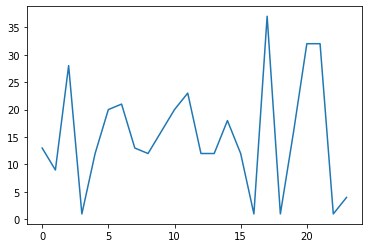

In [0]:
plt.plot(final[0])

In [0]:
validate

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574,5575,5576,5577,5578,5579,5580,5581,5582,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599,5600,5601,5602,5603,5604,5605,5606,5607,5608,5609,5610,5611,5612
0,13.0,20.0,37.0,25.0,36.0,12.0,36.0,1.0,28.0,20.0,16.0,21.0,35.0,32.0,35.0,30.0,23.0,35.0,16.0,36.0,9.0,16.0,35.0,16.0,20.0,20.0,12.0,1.0,36.0,12.0,16.0,36.0,20.0,13.0,16.0,21.0,36.0,12.0,36.0,36.0,36.0,28.0,28.0,32.0,26.0,16.0,16.0,16.0,32.0,28.0,...,21.0,21.0,13.0,20.0,12.0,20.0,21.0,28.0,16.0,1.0,1.0,20.0,16.0,16.0,16.0,1.0,16.0,16.0,16.0,1.0,28.0,1.0,16.0,20.0,4.0,0.0,16.0,21.0,19.0,16.0,16.0,7.0,16.0,20.0,21.0,4.0,16.0,28.0,20.0,35.0,16.0,16.0,16.0,20.0,21.0,4.0,4.0,16.0,1.0,17.0
1,9.0,30.0,21.0,21.0,1.0,16.0,36.0,20.0,37.0,13.0,7.0,16.0,21.0,21.0,32.0,21.0,20.0,36.0,35.0,36.0,1.0,19.0,16.0,16.0,21.0,21.0,20.0,21.0,32.0,32.0,13.0,16.0,32.0,13.0,20.0,7.0,36.0,1.0,36.0,12.0,16.0,28.0,16.0,36.0,30.0,19.0,20.0,7.0,36.0,16.0,...,32.0,21.0,16.0,20.0,13.0,1.0,27.0,1.0,21.0,7.0,16.0,35.0,1.0,21.0,4.0,32.0,16.0,28.0,16.0,35.0,16.0,1.0,16.0,16.0,1.0,16.0,35.0,35.0,16.0,16.0,20.0,16.0,20.0,16.0,21.0,16.0,16.0,16.0,25.0,38.0,16.0,21.0,1.0,28.0,21.0,28.0,20.0,19.0,21.0,37.0
2,28.0,12.0,13.0,37.0,36.0,35.0,32.0,20.0,13.0,16.0,7.0,21.0,13.0,12.0,13.0,21.0,16.0,36.0,16.0,36.0,16.0,1.0,16.0,16.0,16.0,37.0,13.0,20.0,35.0,16.0,12.0,32.0,32.0,32.0,21.0,20.0,36.0,16.0,28.0,37.0,16.0,16.0,32.0,36.0,16.0,16.0,16.0,20.0,28.0,1.0,...,16.0,16.0,36.0,12.0,21.0,4.0,35.0,16.0,4.0,1.0,16.0,16.0,16.0,20.0,1.0,16.0,16.0,21.0,16.0,21.0,16.0,25.0,4.0,32.0,21.0,21.0,36.0,16.0,16.0,21.0,16.0,16.0,21.0,38.0,21.0,16.0,21.0,16.0,19.0,20.0,1.0,16.0,36.0,27.0,4.0,28.0,25.0,19.0,21.0,25.0
3,1.0,16.0,12.0,7.0,20.0,16.0,1.0,12.0,13.0,7.0,34.0,16.0,12.0,13.0,20.0,16.0,20.0,4.0,20.0,12.0,32.0,21.0,16.0,16.0,21.0,37.0,13.0,23.0,21.0,1.0,4.0,21.0,32.0,12.0,8.0,12.0,8.0,32.0,16.0,36.0,13.0,21.0,20.0,13.0,35.0,21.0,16.0,32.0,21.0,1.0,...,19.0,28.0,16.0,20.0,20.0,4.0,20.0,9.0,16.0,1.0,16.0,38.0,1.0,20.0,4.0,4.0,16.0,34.0,21.0,21.0,16.0,1.0,16.0,20.0,20.0,28.0,21.0,16.0,4.0,21.0,16.0,16.0,16.0,1.0,20.0,32.0,20.0,16.0,28.0,38.0,1.0,20.0,8.0,16.0,1.0,28.0,4.0,1.0,4.0,7.0
4,12.0,16.0,13.0,1.0,7.0,25.0,16.0,35.0,20.0,21.0,21.0,35.0,28.0,4.0,36.0,35.0,21.0,35.0,16.0,1.0,7.0,16.0,23.0,28.0,36.0,21.0,35.0,13.0,13.0,13.0,12.0,20.0,4.0,1.0,36.0,16.0,7.0,32.0,36.0,20.0,16.0,6.0,12.0,12.0,19.0,21.0,21.0,21.0,37.0,1.0,...,12.0,16.0,4.0,16.0,21.0,16.0,20.0,27.0,4.0,20.0,19.0,1.0,13.0,13.0,1.0,20.0,16.0,16.0,16.0,16.0,16.0,36.0,16.0,32.0,1.0,20.0,16.0,21.0,4.0,16.0,32.0,16.0,37.0,16.0,16.0,20.0,21.0,36.0,16.0,32.0,1.0,16.0,13.0,16.0,1.0,20.0,1.0,16.0,21.0,21.0
5,20.0,13.0,37.0,19.0,36.0,21.0,13.0,13.0,32.0,2.0,20.0,13.0,12.0,13.0,13.0,12.0,20.0,36.0,35.0,30.0,7.0,16.0,35.0,4.0,35.0,37.0,16.0,35.0,20.0,9.0,13.0,1.0,1.0,1.0,32.0,16.0,16.0,21.0,1.0,1.0,32.0,35.0,12.0,35.0,25.0,8.0,20.0,16.0,35.0,35.0,...,16.0,35.0,1.0,35.0,20.0,4.0,16.0,16.0,28.0,36.0,20.0,16.0,16.0,21.0,16.0,16.0,16.0,27.0,1.0,35.0,4.0,21.0,32.0,35.0,16.0,35.0,16.0,21.0,16.0,20.0,16.0,21.0,16.0,1.0,20.0,21.0,16.0,25.0,21.0,20.0,20.0,25.0,16.0,4.0,1.0,16.0,32.0,20.0,7.0,21.0
6,21.0,23.0,21.0,16.0,1.0,1.0,28.0,8.0,7.0,12.0,20.0,21.0,1.0,4.0,4.0,7.0,13.0,36.0,16.0,12.0,7.0,4.0,28.0,35.0,20.0,21.0,37.0,37.0,1.0,20.0,21.0,29.0,13.0,16.0,7.0,35.0,31.0,37.0,36.0,27.0,13.0,36.0,1.0,13.0,1.0,1.0,26.0,30.0,1.0,35.0,...,21.0,16.0,1.0,16.0,16.0,13.0,32.0,28.0,16.0,1.0,8.0,28.0,35.0,1.0,16.0,12.0,16.0,20.0,28.0,16.0,21.0,35.0,21.0,16.0,1.0,16.0,16.0,16.0,4.0,38.0,28.0,34.0,21.0,32.0,7.0,21.0,16.0,1.0,21.0,32.0,19.0,1.0,1.0,7.0,4.0,1.0,21.0,27.0,38.0,21.0
7,13.0,13.0,23.0,21.0,25.0,21.0,32.0,37.0,16.0,12.0,35.0,21.0,21.0,7.0,16.0,38.0,1.0,16.0,1.0,12.0,8.0,4.0,12.0,35.0,36.0,5.0,4.0,21.0,1.0,16.0,36.0,21.0,12.0,13.0,7.0,20.0,21.0,1.0,36.0,1.0,36.0

In [0]:
flag = False
for i in range(len(final)):
    k = final[i]
    if(check(k)):
        final = pd.concat((final.iloc[:,:i], final.iloc[:,i+1:]))

In [0]:
out =[]
for i in final:
    for j in final[i]:
        out.append(j)
out = pd.DataFrame(out)

In [0]:
np.random.seed(7)

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df=DataFrame(data)
    cols, names = [], []
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)'%(j+1,i))for j in range(n_vars)]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if(i == 0):
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        #end if
    agg = concat(cols,axis=1)
    agg.columns = names
    if(dropnan):
        agg.dropna(inplace = True)
    return agg

In [0]:
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [0]:
def prepare_data(series, n_test, n_lag, n_seq):
    raw_values = series.values
    diff_series = difference(raw_values,1)
    diff_values =diff_series.values
    diff_values = diff_values.reshape(len(diff_values),1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    print(supervised_values)
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

In [0]:
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    X,y = train[:,0:n_lag], train[:,n_lag:]
    X = X.reshape(X.shape[0],1,X.shape[1])
    model=Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(n_neurons//2, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

    for i in range(n_epochs):
        print('Training sample number: ',i)
        model.fit(X,y,epochs=1, batch_size=n_batch, shuffle=False)
        model.reset_states()
    return model

In [0]:
def forecast_lstm(model, X, n_batch):
    X=X.reshape(1,1,len(X))
    forecast = model.predict(X, batch_size = n_batch)
    return [x for x in forecast[0,:]]

In [0]:
def make_forecasts(model,n_batch,test,n_lag,n_seq):
    forecasts = list()
    for i in range(len(test)):
        X,y =test[i,0:n_lag],test[i,n_lag:]
        print(X, y)
        print('\n')
        forecast = forecast_lstm(model,X,n_batch)
        forecasts.append(forecast)
        print(forecasts)
        print(np.shape(forecasts))
        print('\n')
    return forecasts

In [0]:
def out_forecast(model,n_batch,X):
    print(X)
    forecast = forecast_lstm(model,X,n_batch)
    forecasts.append(forecast)
    print(forecast)
    print(np.shape(forecast))
    print('\n')
    return forecast

In [0]:
def inverse_difference(last_ob, forecast):
    inverted = []
    inverted.append(forecast[0] + last_ob)
    for i in range(1,len(forecast)):
        inverted.append(forecast[i]+ inverted[i-1])
    return inverted

In [0]:
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        
        # create array from forecast
        forecast = np.array(forecasts[i])
        
        forecast = forecast.reshape(1, len(forecast))
        print(forecast)
        print(forecast.shape)
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted

In [0]:
def plot_forecasts(series, forecasts, n_test):
    # plot the entire dataset in blue
    plt.plot(series.values)
    # plot the forecasts in red
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        plt.plot(xaxis, yaxis, color='red')
    # show the plot
    plt.show()

In [0]:
def evaluate_forecasts(test, forecasts):
    for i in range(len(test)):
        rmse = math.sqrt(mean_squared_error(test[i], forecasts[i]))
        print('t+%d RMSE: %f' % ((i+1), rmse))

In [0]:
n_lag = 1
n_seq = 23
n_test = 1
n_epochs = 50
n_batch = 1
n_neurons = 100

In [0]:
scaler, train, test = prepare_data(out, n_test, n_lag, n_seq)

[[-0.10526316  0.5        -0.71052632 ... -0.81578947  0.07894737
   0.42105263]
 [ 0.5        -0.71052632  0.28947368 ...  0.07894737  0.42105263
   0.26315789]
 [-0.71052632  0.28947368  0.21052632 ...  0.42105263  0.26315789
  -0.47368421]
 ...
 [-0.52631579  0.68421053 -0.26315789 ...  0.          0.
   0.        ]
 [ 0.68421053 -0.26315789  0.52631579 ...  0.          0.
   0.        ]
 [-0.26315789  0.52631579 -0.31578947 ...  0.          0.
   0.        ]]


In [0]:
test

array([[-0.26315789,  0.52631579, -0.31578947, -0.47368421,  0.36842105,
         0.        ,  0.        ,  0.        , -0.02631579,  0.42105263,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [0]:
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)

Training sample number:  0
Epoch 1/1
134687/134687 [==============================] - 281s 2ms/step - loss: 0.1501 - accuracy: 0.0597
Training sample number:  1
Epoch 1/1
134687/134687 [==============================] - 282s 2ms/step - loss: 0.1497 - accuracy: 0.0579
Training sample number:  2
Epoch 1/1
134687/134687 [==============================] - 276s 2ms/step - loss: 0.1496 - accuracy: 0.0575
Training sample number:  3
Epoch 1/1
134687/134687 [==============================] - 280s 2ms/step - loss: 0.1496 - accuracy: 0.0568
Training sample number:  4
Epoch 1/1
134687/134687 [==============================] - 278s 2ms/step - loss: 0.1495 - accuracy: 0.0570
Training sample number:  5
Epoch 1/1
134687/134687 [==============================] - 278s 2ms/step - loss: 0.1495 - accuracy: 0.0572
Training sample number:  6
Epoch 1/1
134687/134687 [==============================] - 280s 2ms/step - loss: 0.1496 - accuracy: 0.0568
Training sample number:  7
Epoch 1/1
134687/134687 [==========

In [0]:
forecasts = make_forecasts(model, n_batch, test, n_lag, n_seq)

[-0.26315789] [ 0.52631579 -0.31578947 -0.47368421  0.36842105  0.          0.
  0.         -0.02631579  0.42105263  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[[0.07403327, 0.015847577, 0.003335543, 2.3049302e-05, -0.0008318166, 0.00096690294, -0.001743172, -0.0015766552, 0.0015081121, -0.001922122, -0.0038739634, -0.00087882695, -0.0011498802, 0.0019316517, 0.0010547389, -0.0035247903, 0.0026530342, 0.0019745314, -0.00044042838, -0.0035484163, -0.00034780143, 0.00080276537, 0.00029077556]]
(1, 23)




In [0]:
forecast = inverse_transform(out, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual1 = inverse_transform(out, actual, scaler, n_test+2)

[[ 7.4033268e-02  1.5847577e-02  3.3355430e-03  2.3049302e-05
  -8.3181658e-04  9.6690294e-04 -1.7431719e-03 -1.5766552e-03
   1.5081121e-03 -1.9221220e-03 -3.8739634e-03 -8.7882695e-04
  -1.1498802e-03  1.9316517e-03  1.0547389e-03 -3.5247903e-03
   2.6530342e-03  1.9745314e-03 -4.4042838e-04 -3.5484163e-03
  -3.4780143e-04  8.0276537e-04  2.9077556e-04]]
(1, 23)
[[ 0.52631579 -0.31578947 -0.47368421  0.36842105  0.          0.
   0.         -0.02631579  0.42105263  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
(1, 23)


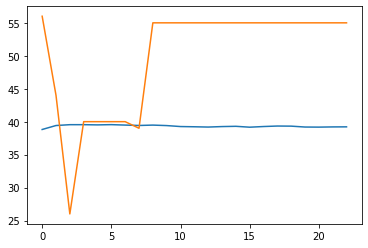

In [0]:
plt.plot(forecast[0])
plt.plot(actual1[0])

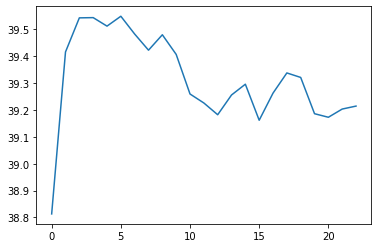

In [0]:
for i in range(len(forecast)):
    plt.plot(forecast[i])
plt.show()

In [0]:
evaluate_forecasts(actual1[0], forecast[0])

t+1 RMSE: 17.186736
t+2 RMSE: 4.584528
t+3 RMSE: 13.542223
t+4 RMSE: 0.456901
t+5 RMSE: 0.488510
t+6 RMSE: 0.451768
t+7 RMSE: 0.518009
t+8 RMSE: 0.422078
t+9 RMSE: 15.520613
t+10 RMSE: 15.593654
t+11 RMSE: 15.740865
t+12 RMSE: 15.774260
t+13 RMSE: 15.817955
t+14 RMSE: 15.744553
t+15 RMSE: 15.704473
t+16 RMSE: 15.838415
t+17 RMSE: 15.737599
t+18 RMSE: 15.662567
t+19 RMSE: 15.679303
t+20 RMSE: 15.814143
t+21 RMSE: 15.827360
t+22 RMSE: 15.796855
t+23 RMSE: 15.785805


In [0]:
s = np.array(forecasts[0])

In [0]:
s = s.reshape(1,23)
print(s)

[[ 7.4033268e-02  1.5847577e-02  3.3355430e-03  2.3049302e-05
  -8.3181658e-04  9.6690294e-04 -1.7431719e-03 -1.5766552e-03
   1.5081121e-03 -1.9221220e-03 -3.8739634e-03 -8.7882695e-04
  -1.1498802e-03  1.9316517e-03  1.0547389e-03 -3.5247903e-03
   2.6530342e-03  1.9745314e-03 -4.4042838e-04 -3.5484163e-03
  -3.4780143e-04  8.0276537e-04  2.9077556e-04]]


In [0]:
inv_scale=scaler.inverse_transform(s)
inv_scale

array([[ 2.81326413e+00,  6.02207899e-01,  1.26750633e-01,
         8.75873491e-04, -3.16090286e-02,  3.67423110e-02,
        -6.62405342e-02, -5.99128976e-02,  5.73082566e-02,
        -7.30406344e-02, -1.47210613e-01, -3.33954245e-02,
        -4.36954498e-02,  7.34027624e-02,  4.00800779e-02,
        -1.33942038e-01,  1.00815296e-01,  7.50321969e-02,
        -1.67362783e-02, -1.34839818e-01, -1.32164545e-02,
         3.05050835e-02,  1.10494709e-02]], dtype=float32)

In [0]:
inv_diff = inverse_difference(67, inv_scale)

In [0]:
inv_diff

[array([69.81326 , 67.60221 , 67.12675 , 67.00088 , 66.96839 , 67.03674 ,
        66.93376 , 66.94009 , 67.05731 , 66.926956, 66.85279 , 66.966606,
        66.95631 , 67.0734  , 67.04008 , 66.86606 , 67.100815, 67.075035,
        66.98326 , 66.86516 , 66.986786, 67.0305  , 67.01105 ],
       dtype=float32)]

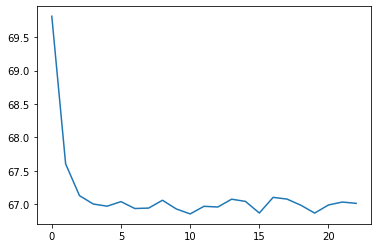

In [0]:
plt.plot(inv_diff[0])

In [0]:
inv_scale = inv_scale[0, :]
inv_scale

array([ 2.81326413e+00,  6.02207899e-01,  1.26750633e-01,  8.75873491e-04,
       -3.16090286e-02,  3.67423110e-02, -6.62405342e-02, -5.99128976e-02,
        5.73082566e-02, -7.30406344e-02, -1.47210613e-01, -3.33954245e-02,
       -4.36954498e-02,  7.34027624e-02,  4.00800779e-02, -1.33942038e-01,
        1.00815296e-01,  7.50321969e-02, -1.67362783e-02, -1.34839818e-01,
       -1.32164545e-02,  3.05050835e-02,  1.10494709e-02], dtype=float32)

In [0]:
inv_diff = inverse_difference(67, inv_scale)
inv_diff

[69.81326413154602,
 70.41547203063965,
 70.54222266376019,
 70.54309853725135,
 70.51148950867355,
 70.54823181964457,
 70.48199128545821,
 70.42207838781178,
 70.47938664443791,
 70.40634601004422,
 70.25913539715111,
 70.2257399726659,
 70.1820445228368,
 70.25544728524983,
 70.29552736319602,
 70.1615853253752,
 70.2624006215483,
 70.33743281848729,
 70.32069654017687,
 70.18585672229528,
 70.17264026775956,
 70.2031453512609,
 70.21419482212514]

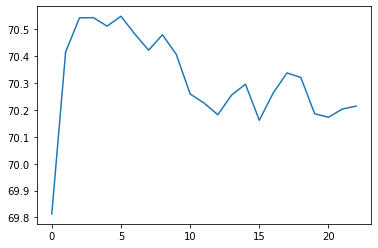

In [0]:
plt.plot(inv_diff)

In [0]:
x = np.zeros(1)
x[0] = 0.40722477
x

array([0.40722477])

In [0]:
t = out_forecast(model,n_batch,x)

[0.40722477]
[-0.39274615, -0.0041071754, -0.0072517055, 0.0065095257, -0.0037148208, -0.00034737715, 0.0027009072, -0.0028974952, -0.0018739676, -0.002438697, 0.0019981419, -0.007491328, 0.009635595, -0.005407941, -0.0030845713, 0.006518958, -0.0023269793, -0.0054437574, 0.0024724207, 0.0047772336, 0.0030082185, -0.0057657408, 0.0010047032]
(23,)




In [0]:
inv_scale = scaler.inverse_transform(np.array(t).reshape(1,23))
inv_scale = inv_scale[0, :]
inv_diff = inverse_difference(67, inv_scale)
inv_diff

[52.07564640045166,
 51.91957373917103,
 51.64400891959667,
 51.89137089252472,
 51.75020770728588,
 51.73700737580657,
 51.839641850441694,
 51.7295370362699,
 51.658326264470816,
 51.565655779093504,
 51.6415851674974,
 51.356914695352316,
 51.72306727990508,
 51.51756551489234,
 51.4003518037498,
 51.648072209209204,
 51.559646997600794,
 51.35278422012925,
 51.446736205369234,
 51.62827107682824,
 51.74258338287473,
 51.523485232144594,
 51.56166395545006]

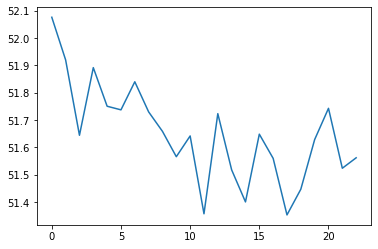

In [0]:
plt.plot(inv_diff)